In [53]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import struct
from scipy import signal

pwd = os.getcwd()
fb = open(pwd + "//" + "test" + "//" + "100-2" + "//" + "4", "rb")
x = 0
datax = []
datay1 = []
datay2 = []

while True:
    data = fb.read(4)
    if not data:
        break
    ch1, ch2 = struct.unpack('<HH', data)
    ch1 = (float(ch1) - 8192) / 8192 * 2.5
    ch2 = (float(ch2) - 8192) / 8192 * 2.5
    ch1 = float(ch1)
    ch2 = float(ch2)
    x = x + 1
    datax.append(x * 0.0000001)
    datay1.append(ch1)
    datay2.append(ch2)

datay1 = datay1[200000:700000]
datay2 = datay2[200000:700000]
count = len(datay1)

fftnum = 8192
std = 1500
fftrepeat = 0

axis_xf = range(int(fftnum/2))
freq = [i * 10000000.0 / fftnum for i in axis_xf]

index = 0
magnitude1 = []
magnitude2 = []
while True:
    data1 = np.array(datay1[index:index + fftnum])
    data2 = np.array(datay2[index:index + fftnum])
    win = signal.gaussian(fftnum, std)
    data1 = np.multiply(data1,win)
    data2 = np.multiply(data2,win)
    data1 = np.abs(np.fft.fft(data1, fftnum)) / (fftnum / 2)
    data2 = np.abs(np.fft.fft(data2, fftnum)) / (fftnum / 2)
    magnitude1.append(data1)
    magnitude2.append(data2)
    index += int(fftnum * (1 - fftrepeat))
    if index + fftnum > count:
        break

mag1 = sum(np.array(magnitude1)) / len(magnitude1)
mag2 = sum(np.array(magnitude2)) / len(magnitude2)

start = int(fftnum / 500)
end = int(fftnum / 25)
#print end - start

mag1 = mag1[start:end]
maxmag1 = max(mag1)
mag1 = mag1 / maxmag1

mag2 = mag2[start:end]
maxmag2 = max(mag2)
mag2 = mag2 / maxmag2

INFO:tensorflow:Restoring parameters from model/fft


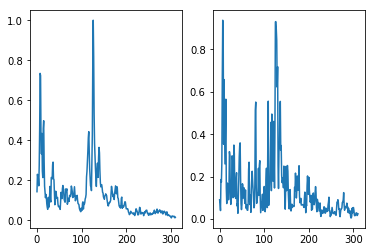

3.0287333


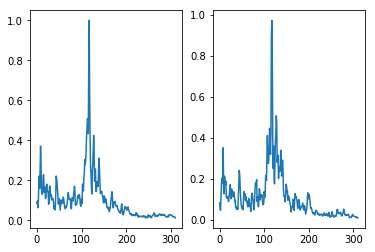

0.5176662


In [54]:
with tf.Session() as sess:  
    
    tf.local_variables_initializer().run()
    tf.global_variables_initializer().run()
    
    coord = tf.train.Coordinator()
    thread = tf.train.start_queue_runners(sess=sess,coord=coord)
    
    saver = tf.train.import_meta_graph('model/fft.meta')
    saver.restore(sess,'model/fft')  
    y = tf.get_collection('output_y')[0]
    l = tf.get_collection('output_y')[1]
    
    graph = tf.get_default_graph()
    x = graph.get_tensor_by_name("input_x:0")
    
    outputdata1,loss1 = sess.run([y,l],feed_dict ={x:[mag1]})
    outputdata2,loss2 = sess.run([y,l],feed_dict ={x:[mag2]})
    
    plt.subplot(1,2,1)
    plt.plot(mag1)
    plt.subplot(1,2,2)
    plt.plot(outputdata1[0])
    plt.show()
    print (loss1)
    
    plt.subplot(1,2,1)
    plt.plot(mag2)
    plt.subplot(1,2,2)
    plt.plot(outputdata2[0])
    plt.show()
    print (loss2)
    
    coord.request_stop()
    coord.join(thread)